<a href="https://colab.research.google.com/github/Joacco11/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

#1. Análisis de facturación



In [3]:
def facturacion_total():
    data = {
        'Tienda': ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4'],
        'Facturación': [
            round(tienda['Precio'].sum(),2),
            round(tienda2['Precio'].sum(),2),
            round(tienda3['Precio'].sum(),2),
            round(tienda4['Precio'].sum(),2)
        ]
    }
    return pd.DataFrame(data)

facturacion_total()

,Tienda,Facturación
0,Tienda_1,1.150880e+09
1,Tienda_2,1.116344e+09
2,Tienda_3,1.098020e+09
3,Tienda_4,1.038376e+09


# 2. Ventas por categoría

In [4]:
def ventas_por_categoria_y_tienda():
    # Añadir columna de tienda a cada DataFrame
    df1 = tienda.assign(Tienda='Tienda 1')
    df2 = tienda2.assign(Tienda='Tienda 2')
    df3 = tienda3.assign(Tienda='Tienda 3')
    df4 = tienda4.assign(Tienda='Tienda 4')

    # Concatenar
    tiendas_combinadas = pd.concat([df1, df2, df3, df4], ignore_index=True)

    # Agrupar por categoría y tienda
    ventas = tiendas_combinadas.groupby(['Categoría del Producto', 'Tienda'])['Precio'].sum().reset_index()
    return ventas
ventas_por_categoria_y_tienda()

,Categoría del Producto,Tienda,Precio
0,Artículos para el hogar,Tienda 1,12698400.0
1,Artículos para el hogar,Tienda 2,14746900.0
2,Artículos para el hogar,Tienda 3,15060000.0
3,Artículos para el hogar,Tienda 4,15074500.0
4,Deportes y diversión,Tienda 1,39290000.0
5,Deportes y diversión,Tienda 2,34744500.0
6,Deportes y diversión,Tienda 3,35593100.0
7,Deportes y diversión,Tienda 4,33350100.0
8,Electrodomésticos,Tienda 1,363685200.0
9,Electrodomésticos,Tienda 2,348567800.0


# 3. Calificación promedio de la tienda


In [5]:
def calificacion_promedio():
  # Calcular calificación promedio por tienda
  calif_tienda1 = tienda['Calificación'].mean()
  calif_tienda2 = tienda2['Calificación'].mean()
  calif_tienda3 = tienda3['Calificación'].mean()
  calif_tienda4 = tienda4['Calificación'].mean()

  # Crear DataFrame con resultados
  calificaciones = pd.DataFrame({
      'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
      'Calificación Promedio': [calif_tienda1, calif_tienda2, calif_tienda3, calif_tienda4]
  })
  return pd.DataFrame(calificaciones)
calificacion_promedio()

,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


# 4. Productos más y menos vendidos

In [6]:

def ventas_top_y_bottom_unidades():
    df1 = tienda.assign(Tienda='Tienda 1')
    df2 = tienda2.assign(Tienda='Tienda 2')
    df3 = tienda3.assign(Tienda='Tienda 3')
    df4 = tienda4.assign(Tienda='Tienda 4')

    # Concatenar
    combinado = pd.concat([df1, df2, df3, df4], ignore_index=True)

    # Contar unidades vendidas por producto y tienda
    ventas = combinado.groupby(['Producto', 'Tienda']).size().reset_index(name='Unidades Vendidas')

    # Top 5 por tienda
    top_df = (ventas.sort_values(['Tienda', 'Unidades Vendidas'], ascending=[True, False])
                     .groupby('Tienda')
                     .head(5)
                     .reset_index(drop=True))

    # Bottom 5 por tienda
    bottom_df = (ventas.sort_values(['Tienda', 'Unidades Vendidas'], ascending=[True, True])
                        .groupby('Tienda')
                        .head(5)
                        .reset_index(drop=True))

    return top_df, bottom_df
top_df, bottom_df = ventas_top_y_bottom_unidades()
bottom_df



,Producto,Tienda,Unidades Vendidas
0,Auriculares con micrófono,Tienda 1,33
1,Celular ABXY,Tienda 1,33
2,Olla de presión,Tienda 1,35
3,Pandereta,Tienda 1,36
4,Ciencia de datos con Python,Tienda 1,39
5,Juego de mesa,Tienda 2,32
6,Impresora,Tienda 2,34
7,Mesa de comedor,Tienda 2,34
8,Sillón,Tienda 2,35
9,Auriculares,Tienda 2,37


# 5. Envío promedio por tienda

In [7]:
def promedio_costo_envio():
    data = {
        'Tienda': ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4'],
        'Promedio Costo de Envío': [
            round(tienda['Costo de envío'].mean(), 2),
            round(tienda2['Costo de envío'].mean(), 2),
            round(tienda3['Costo de envío'].mean(), 2),
            round(tienda4['Costo de envío'].mean(), 2)
        ]
    }
    return pd.DataFrame(data)

promedio_costo_envio()

,Tienda,Promedio Costo de Envío
0,Tienda_1,26018.61
1,Tienda_2,25216.24
2,Tienda_3,24805.68
3,Tienda_4,23459.46


#6. Diagramas de Análisis



*   Línea de Tiempo



/tmp/ipython-input-2722364596.py:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tiendas_combinadas['Fecha de Compra'] = pd.to_datetime(tiendas_combinadas['Fecha de Compra'])


<Figure size 1500x800 with 0 Axes>

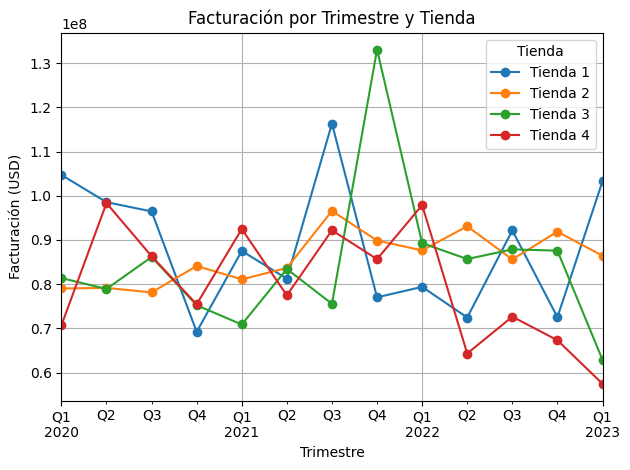

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear copias con columna 'Tienda'
df1 = tienda.assign(Tienda='Tienda 1')
df2 = tienda2.assign(Tienda='Tienda 2')
df3 = tienda3.assign(Tienda='Tienda 3')
df4 = tienda4.assign(Tienda='Tienda 4')

# Concatenar
tiendas_combinadas = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Asegurar que 'Fecha de Compra' sea datetime
tiendas_combinadas['Fecha de Compra'] = pd.to_datetime(tiendas_combinadas['Fecha de Compra'])

# Crear columna de trimestre (ej: 2023Q1)
tiendas_combinadas['Trimestre'] = tiendas_combinadas['Fecha de Compra'].dt.to_period('Q')

# Agrupar por tienda y trimestre sumando la facturación
facturacion_trimestral = (
    tiendas_combinadas.groupby(['Trimestre', 'Tienda'])['Precio']
    .sum()
    .reset_index()
)

# Pivotar para que cada tienda sea una columna
facturacion_pivot = facturacion_trimestral.pivot(index='Trimestre', columns='Tienda', values='Precio')

# Graficar
plt.figure(figsize=(15, 8))
facturacion_pivot.plot(marker='o')
plt.title('Facturación por Trimestre y Tienda')
plt.ylabel('Facturación (USD)')
plt.xlabel('Trimestre')
plt.legend(title='Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()
